# Interfacing with Stan
This notebook explains how it is possible to interface with [Stan](https://mc-stan.org/) which allows PINTS users access to Stan model log-probability density calculations and gradient calculations (via autodiff). In doing so, it gives users in PINTS the benefits of using Stan's large family of probability distributions to construct their model. The model can then be run using PINTS' samplers and optimisers.

One thing to be mindful of is that the interface below only allows the log-probability density to be accessed from Stan objects up to an additive constant. Another is that Stan operates on the unconstrained scale, so the PINTS interface to Stan passes and receives parameter draws on this scale.

In this notebook, we use two examples:

- a simple Gaussian example: which shows the basics of how the interface works
- the [Eight Schools example](http://pints.readthedocs.io/en/latest/toy/eight_schools.html): which shows how it is possible to fit hierarchical models coded in Stan within PINTS

## Using Stan in a notebook

Before we can use the `stan` module in a notebook, we need to load the [`nest_asyncio`](https://pypi.org/project/nest-asyncio/) module, [as detailed here](https://pystan.readthedocs.io/en/latest/faq.html#how-can-i-use-pystan-with-jupyter-notebook-or-jupyterlab):

In [1]:
import nest_asyncio
nest_asyncio.apply()

Note that this is only for notebooks. We don't need to use this module when using the stan interface in ordinary Python scripts.

## Gaussian example

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

import pints
import pints.toy
from pints.interfaces.stan import StanLogPDF

import stan

In [3]:
code = '''
        data {
  int<lower=0> N;
  array[N] real y;
}
parameters {
  real mu;
  real sigma; 
}
model {
  y ~ normal(mu, sigma);
}'''

First create some data and compile a Stan model.

In [4]:
data = {'N':10, 'y':np.random.normal(size=10)}

stanmodel = StanLogPDF(code, data)

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_hwo107n8/model_dmx7dk6c.stan', line 11, column 17: A
    normal distribution is given parameter sigma as a scale parameter
    (argument 2), but sigma was not constrained to be strictly positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


We can print the order of the parameters which is useful to know the correct order to pass the parameters.

In [5]:
stanmodel.n_parameters()

2

Now run a PINTS' [Haario-Bardenet ACMC](sampling/adaptive-covariance-haario-bardenet.ipynb) sampler using the Stan model.

In [6]:
# initialise
xs = [np.random.uniform(size=2,low=0.2, high=1) for chain in range(4)]
    
mcmc = pints.MCMCController(stanmodel, len(xs), xs, method=pints.HaarioBardenetACMC)

# Add stopping criterion
mcmc.set_max_iterations(10000)

# Set up modest logging
mcmc.set_log_to_screen(False)
mcmc.set_log_interval(2000)

# Run!
print('Running...')
full_chains = mcmc.run()
print('Done!')

Running...


/home/michael/dev/pints/pints/interfaces/stan/_stan.py:97: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.0803058, but must be positive! (in '/tmp/httpstan_afk7rtgo/model_dmx7dk6c.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:97: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.147643, but must be positive! (in '/tmp/httpstan_afk7rtgo/model_dmx7dk6c.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:97: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -1.1919, but must be positive! (in '/tmp/httpstan_afk7rtgo/model_dmx7dk6c.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:97: UserWarning: Error encountered when evaluating Stan LogPDF: 

Done!


/home/michael/dev/pints/pints/interfaces/stan/_stan.py:97: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.116432, but must be positive! (in '/tmp/httpstan_afk7rtgo/model_dmx7dk6c.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:97: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.176183, but must be positive! (in '/tmp/httpstan_afk7rtgo/model_dmx7dk6c.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:97: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.107793, but must be positive! (in '/tmp/httpstan_afk7rtgo/model_dmx7dk6c.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:97: UserWarning: Error encountered when evaluating Stan LogPDF:

/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.147498, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.370986, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.458162, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF:

/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.0638259, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.198045, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.336113, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF

/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.263221, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.120081, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.819832, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF:

/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.424487, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.281926, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.317946, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF:

/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.274043, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.442026, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -1.28467, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: 

/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.693778, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.203724, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.526946, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF:

/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.487275, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.143958, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -1.02703, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: 

/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.317353, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.25777, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.778075, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: 

/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.0117335, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.42534, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.313245, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF:

/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.106086, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -1.25834, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.0617577, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF:

/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.363173, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -2.33702, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -1.43391, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: E

/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.160296, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.214199, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.94714, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: 

/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.469749, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.39816, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -1.17312, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: E

/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.0539115, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.129678, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.24792, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF:

/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.230809, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.371685, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.0247165, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF

Done!


/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.146877, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.180449, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF: Exception: normal_lpdf: Scale parameter is -0.764441, but must be positive! (in '/tmp/httpstan_ouwxjklg/model_ex6ndcli.stan', line 11, column 2 to column 24)
  warnings.warn(
/home/michael/dev/pints/pints/interfaces/stan/_stan.py:96: UserWarning: Error encountered when evaluating Stan LogPDF:

We get a heap of warnings above because PINTS can (and here does) propose values outside the allowed bounds for a standard deviation parameter for a normal distribution, which quite rightly makes Stan complain. This issue can be solved (see further below) by explicitly placing a lower bound on $\sigma$.

Summaries of the sampling distribution (and the sampling distribution) are provided below.

In [7]:
results = pints.MCMCSummary(
    chains=full_chains, 
    time=mcmc.time(),
    parameter_names=stanmodel.names())
print(results)

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess      ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  -------  --------------
mu       0.32    0.32    -0.32   0.13   0.32   0.52   0.96     1.00    3529.38  651.35
sigma    0.98    0.27    0.60    0.79   0.92   1.11   1.64     1.00    2501.71  461.70


### Constrained $\sigma$
We now illustrate how constraining $\sigma$ results in a changed behaviour. Stan always samples on the unconstrained scale: it is able to do so because its parameters are always defined with bounds in the `parameters` block. (See https://mc-stan.org/docs/2_26/reference-manual/variable-transforms-chapter.html for a description of the different transforms applied to constrained variables.) The PINTS interface to Stan always supplies parameters on the unconstrained scale. In the below Stan code block, we put a lower bound on $\sigma$. Seeing this, Stan performs a log-transformation on this variable. So the draws we obtain via the Stan interface will be unconstrained.

In [10]:
code1 = '''
        data {
  int<lower=0> N;
  array[N] real y;
}
parameters {
  real mu;
  real<lower=0> sigma; 
}
model {
  y ~ normal(mu, sigma);
}'''

As before, we create a model:

In [11]:
stanmodel1 = StanLogPDF(code=code1, data=data)

Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Since the $\sigma$ variable is now unconstrained, we are free to pass unconstrained initial values to the sampler.

In [12]:
xs = [np.random.uniform(size=2,low=-1, high=1) for chain in range(4)]

mcmc = pints.MCMCController(stanmodel1, len(xs), xs, method=pints.HaarioBardenetACMC)

# Add stopping criterion
mcmc.set_max_iterations(10000)

# Set up modest logging
mcmc.set_log_to_screen(True)
mcmc.set_log_interval(2000)

# Run!
print('Running...')
full_chains1 = mcmc.run()
print('Done!')

Running...
Using Haario-Bardenet adaptive covariance MCMC
Generating 4 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Accept.   Time    
0     4      0         0         0         0          0:00.0
1     8      0.5       0.5       0         0          0:00.0
2     12     0.667     0.667     0.333     0.333      0:00.0
3     16     0.75      0.5       0.5       0.25       0:00.0
Initial phase completed.
2000  8004   0.289     0.295     0.29      0.284      0:01.0
4000  16004  0.256186  0.257     0.262     0.257      0:02.0
6000  24004  0.25      0.251     0.249     0.252      0:03.1
8000  32004  0.246     0.247     0.244     0.244      0:04.1
10000 40000  0.243     0.2427    0.2397    0.243      0:05.1
Halting: Maximum number of iterations (10000) reached.
Done!


To compare the draws across the two methods, we need to convert back to the constrained space. Note, that the Stan interface takes care of the Jacobian transformations, so we only need to apply the inverse transformation to the samples (the `exp` function).

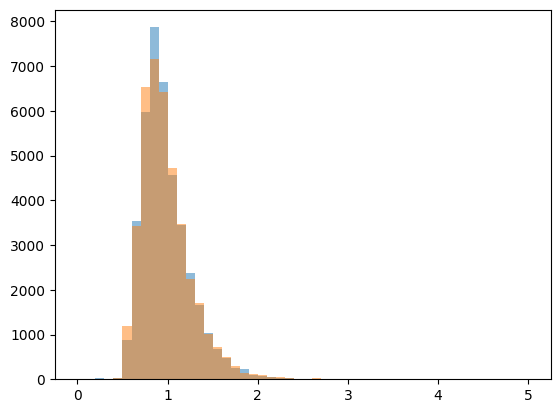

In [13]:
plt.hist(np.vstack(full_chains)[:, 1], bins=np.arange(0, 5 + 0.1, 0.1), alpha=0.5)
plt.hist(np.exp(np.vstack(full_chains1)[:, 1]), bins=np.arange(0, 5 + 0.1, 0.1), alpha=0.5)
plt.show()

## Eight Schools

We now illustrate how to use the Stan interface to sample from the notorious hierarchical eight schools model (see the [eight schools](http://localhost:8888/notebooks/pints/examples/toy/distribution-eight-schools.ipynb) notebook for more on its notoriety). First, we use the PINTS [eight schools toy model](https://github.com/pints-team/pints/blob/main/examples/toy/distribution-eight-schools.ipynb) to give us the requisite data.

In [14]:
model = pints.toy.EightSchoolsLogPDF()
model.data()

{'J': 8,
 'y': [28, 8, -3, 7, -1, 1, 18, 12],
 'sigma': [15, 10, 16, 11, 9, 11, 10, 18]}

### Centered model

We first use PINTS' interface to Stan's models to compile the Stan code for the `centered` model (see the [eight schools](http://localhost:8888/notebooks/pints/examples/toy/distribution-eight-schools.ipynb) notebook) and define a PINTS model.

In [15]:
code="""
data {
  int<lower=0> J;
  array[J] real y;
  array[J] real<lower=0> sigma;
}

parameters {
  real mu;
  real<lower=0> tau;
  array[J] real theta;
}

model {
  mu ~ normal(0, 5);
  tau ~ cauchy(0, 5);
  theta ~ normal(mu, tau);
  y ~ normal(theta, sigma);
}
"""

In [16]:
# instantiate Pints version of Stan model
stanmodel = StanLogPDF(code=code, data=model.data())

print(stanmodel.n_parameters())

Building: 0.1s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.7s
Building: 6.8s
Building: 

In file included from /home/michael/dev/pints/venv/lib64/python3.11/site-packages/httpstan/include/boost/multi_array/multi_array_ref.hpp:32,
                 from /home/michael/dev/pints/venv/lib64/python3.11/site-packages/httpstan/include/boost/multi_array.hpp:34,
                 from /home/michael/dev/pints/venv/lib64/python3.11/site-packages/httpstan/include/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from /home/michael/dev/pints/venv/lib64/python3.11/site-packages/httpstan/include/boost/numeric/odeint.hpp:63,
                 from /home/michael/dev/pints/venv/lib64/python3.11/site-packages/httpstan/include/stan/math/prim/functor/ode_rk45.hpp:9,
                 from /home/michael/dev/pints/venv/lib64/python3.11/site-packages/httpstan/include/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from /home/michael/dev/pints/venv/lib64/python3.11/site-packages/httpstan/include/stan/math/prim/functor.hpp:16,
                 from /home/michae

Building: 7.8s
Building: 7.9s
Building: 8.0s
Building: 8.1s
Building: 8.2s
Building: 8.3s
Building: 8.4s
Building: 8.5s
Building: 8.6s
Building: 8.7s
Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.1s
Building: 9.3s
Building: 9.4s
Building: 9.5s
Building: 9.6s
Building: 9.7s
Building: 9.8s
Building: 9.9s
Building: 10.0s
Building: 10.1s
Building: 10.2s
Building: 10.3s
Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 10.9s
Building: 11.0s
Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s
Building: 11.6s
Building: 11.7s
Building: 11.8s
Building: 11.9s
Building: 12.0s
Building: 12.1s
Building: 12.2s
Building: 12.3s
Building: 12.4s
Building: 12.5s
Building: 12.6s
Building: 12.7s
Building: 12.8s
Building: 12.9s
Building: 13.0s
Building: 13.1s
Building: 13.2s
Building: 13.3s
Building: 13.4s
Building: 13.5s
Building: 13.6s
Building: 13.7s
Building: 13.8s
Building: 13.9s
Building: 14.0s
Building: 14.2s
Building: 14.

Building: 21.7s, done.


10


Run the [Relativistic MCMC](../sampling/relativistic-mcmc.ipynb) sampler using this model.

In [17]:
# initialise
xs = [np.random.normal(size=10) for chain in range(4)]
    
mcmc = pints.MCMCController(stanmodel, len(xs), xs, method=pints.RelativisticMCMC)

# Add stopping criterion
mcmc.set_max_iterations(4000)

# Set up modest logging
mcmc.set_log_to_screen(True)
mcmc.set_log_interval(400)

# # Update step sizes used by individual samplers
for sampler in mcmc.samplers():
    sampler.set_leapfrog_step_size(1.0)

# Run!
print('Running...')
full_chains = mcmc.run()
print('Done!')

Running...
Using Relativistic MCMC
Generating 4 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Accept.   Time    
0     4      0         0         0         0          0:00.0
1     84     0.333     0.333     0         0.333      0:00.0
2     164    0.5       0.5       0         0.5        0:00.0
3     244    0.4       0.6       0         0.6        0:00.0
400   32004  0.975     0.948     0         0.98       0:02.9
800   64004  0.978803  0.961     0         0.783      0:05.8
1200  96004  0.984193  0.961     0         0.523      0:08.6
1600  128004  0.976     0.965     0         0.393      0:11.4
2000  160004  0.976024  0.966     0         0.315      0:14.3
2400  192004  0.964     0.944     0         0.324      0:17.2
2800  224004  0.963     0.896     0         0.417202   0:20.1
3200  256004  0.960025  0.904     0         0.486      0:22.9
3600  288004  0.963     0.911     0         0.540533   0:25.8
4000  319924  0.963     0.918     0         0.581      0

Let's print the results of inference. Note here that $\tau$ is on the log-scale, since Stan sees its lower bound and applies this transformation.

In [18]:
results = pints.MCMCSummary(
    chains=full_chains, 
    time=mcmc.time(),
    parameter_names=stanmodel.names())
print(results)

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess     ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  ------  --------------
mu       3.85    2.65    -0.98   2.23   3.49   5.31   9.74     1.10    164.55  5.72
tau      -0.28   1.70    -2.36   -2.28  0.11   1.25   2.34     1.73    119.09  4.14
theta_0  4.57    4.70    -1.07   0.50   4.21   6.73   16.25    1.20    235.82  8.20
theta_1  3.84    3.80    -3.03   1.42   3.49   5.88   12.57    1.10    nan     nan
theta_2  2.88    4.64    -6.26   -0.16  2.78   5.29   12.28    1.11    nan     nan
theta_3  3.90    3.78    -2.79   1.25   3.64   5.99   12.46    1.12    nan     nan
theta_4  2.56    4.04    -6.06   -0.21  2.50   5.10   10.52    1.13    128.18  4.46
theta_5  2.86    4.21    -5.01   -0.47  3.03   5.32   11.28    1.15    227.43  7.91
theta_6  4.53    4.62    -0.66   0.07   4.31   6.83   15.99    1.24    nan     nan
theta_7  3.88    4.41    -3.64   0.84   3.51   6.02   14.41   

/home/michael/dev/pints/pints/_diagnostics.py:16: RuntimeWarning: invalid value encountered in divide
  x = (x - np.mean(x)) / (np.std(x) * np.sqrt(len(x)))


The wandering chains here illustrate how difficult inference is for this model.

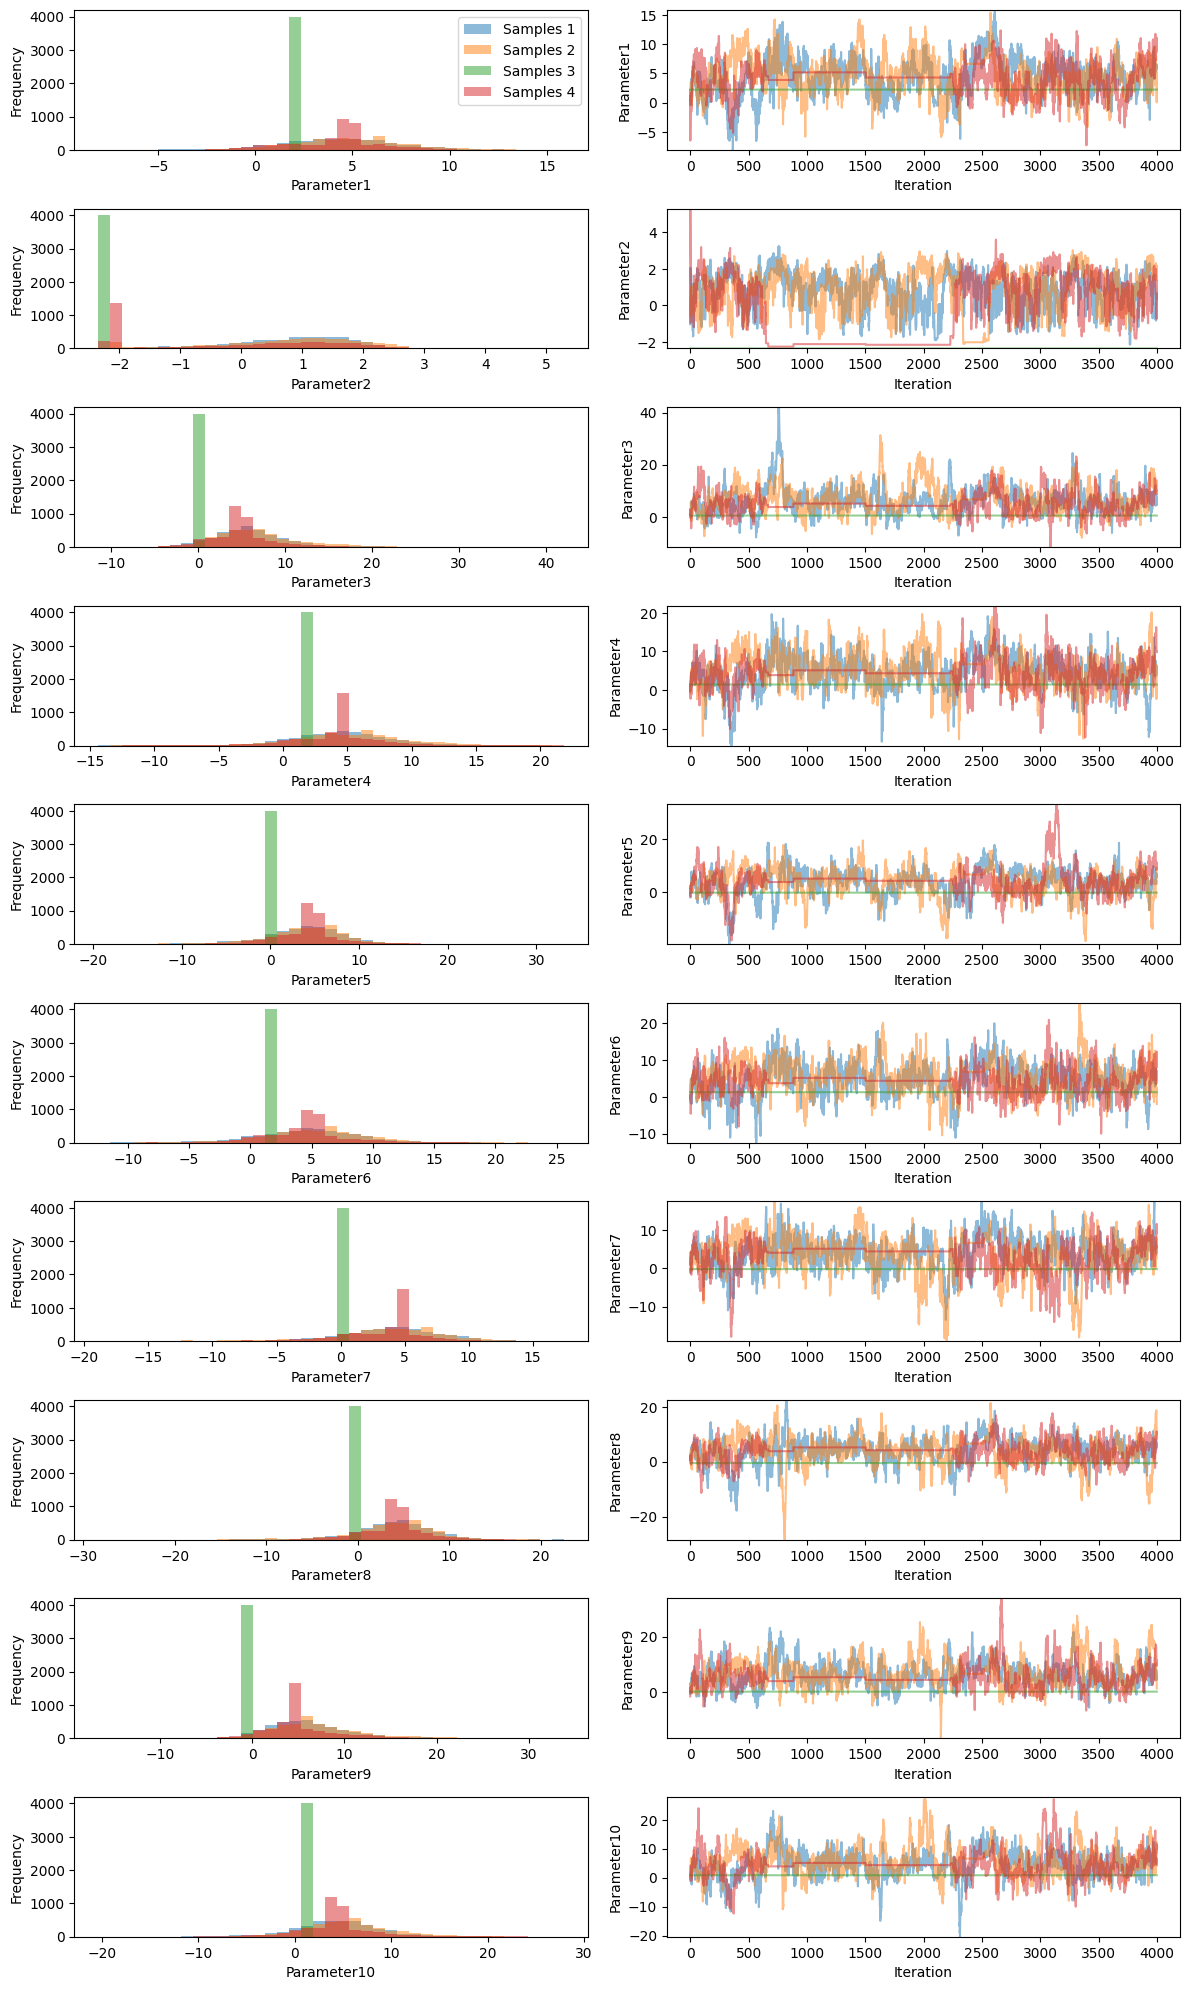

In [19]:
import pints.plot
pints.plot.trace(full_chains)
plt.show()

Just to hammer home the differences between Stan's log probability and PINTS's: we can compare them for sets of parameter values.

In [20]:
params = np.random.uniform(size=10)

pints_parameters = np.copy(params)
stan_parameters = np.copy(params)
# because tau is on log-scale for Stan model
stan_parameters[1] = np.log(stan_parameters[1])

pintsmodel = pints.toy.EightSchoolsLogPDF()

print(str("Stan log prob: " + str(stanmodel(stan_parameters))))
print(str("Pints log prob: " + str(pintsmodel(pints_parameters))))

Stan log prob: -4.9915607098875485
Pints log prob: -44.143565769392175


But the changes in parameter values should evoke proportional changes in the log-posterior.

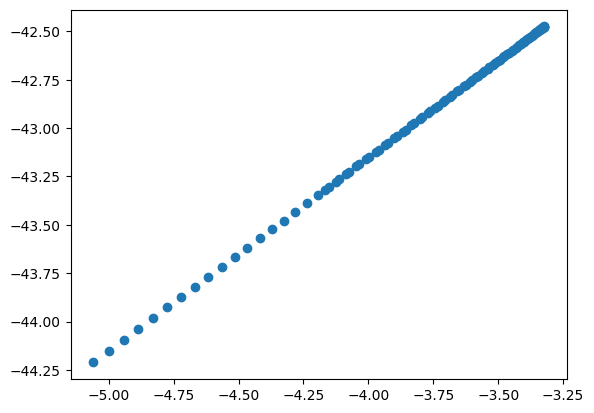

In [21]:
xs = np.linspace(0, 1, 100)
vals_stan = []
vals_pints = []
for x in xs:
    stan_parameters[0] = x
    pints_parameters[0] = x
    vals_stan.append(stanmodel(stan_parameters))
    vals_pints.append(pintsmodel(pints_parameters))
plt.plot(vals_stan, vals_pints, 'o')
plt.show()

Sensitivities however are the same because the constants disappear.

In [22]:
p1, dp1 = stanmodel.evaluateS1(stan_parameters)
p2, dp2 = pintsmodel.evaluateS1(pints_parameters)

print(str("Stan d log(prob)/dmu: " + str(dp1[0])))
print(str("Pints d log(prob)/dmu: " + str(dp2[0])))

Stan d log(prob)/dmu: -4.107069317237351
Pints d log(prob)/dmu: -4.107069317237351


## Non-centered model

To speed things up, we can move to Stan's non-centered parameterisation. (PINTS also has a version of this model.) This model introduces auxillary variables $\tilde{\theta}_j$ which ensure the joint distribution: $p(\mu,\tau, \boldsymbol{\theta})$ remains the same, but is easier to sample from.

In [23]:
code="""
data {
  int<lower=0> J;
  array[J] real y;
  array[J] real<lower=0> sigma;
}

parameters {
  real mu;
  real<lower=0> tau;
  array[J] real theta_tilde;
}

transformed parameters {
  array[J] real theta;
  for (j in 1:J)
    theta[j] = mu + tau * theta_tilde[j];
}

model {
  mu ~ normal(0, 5);
  tau ~ cauchy(0, 5);
  theta_tilde ~ normal(0, 1);
  y ~ normal(theta, sigma);
}
"""

Instantiate Pints version of non-centered Stan model.

In [24]:
stanmodel = StanLogPDF(code=code, data=model.data())

Building: 0.1s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.7s
Building: 6.8s
Building: 

In file included from /home/michael/dev/pints/venv/lib64/python3.11/site-packages/httpstan/include/boost/multi_array/multi_array_ref.hpp:32,
                 from /home/michael/dev/pints/venv/lib64/python3.11/site-packages/httpstan/include/boost/multi_array.hpp:34,
                 from /home/michael/dev/pints/venv/lib64/python3.11/site-packages/httpstan/include/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from /home/michael/dev/pints/venv/lib64/python3.11/site-packages/httpstan/include/boost/numeric/odeint.hpp:63,
                 from /home/michael/dev/pints/venv/lib64/python3.11/site-packages/httpstan/include/stan/math/prim/functor/ode_rk45.hpp:9,
                 from /home/michael/dev/pints/venv/lib64/python3.11/site-packages/httpstan/include/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from /home/michael/dev/pints/venv/lib64/python3.11/site-packages/httpstan/include/stan/math/prim/functor.hpp:16,
                 from /home/michae

Building: 8.1s
Building: 8.2s
Building: 8.3s
Building: 8.4s
Building: 8.5s
Building: 8.6s
Building: 8.7s
Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.1s
Building: 9.2s
Building: 9.3s
Building: 9.5s
Building: 9.6s
Building: 9.7s
Building: 9.8s
Building: 9.9s
Building: 10.0s
Building: 10.1s
Building: 10.2s
Building: 10.3s
Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 10.9s
Building: 11.0s
Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s
Building: 11.6s
Building: 11.7s
Building: 11.8s
Building: 11.9s
Building: 12.0s
Building: 12.1s
Building: 12.2s
Building: 12.3s
Building: 12.4s
Building: 12.5s
Building: 12.6s
Building: 12.7s
Building: 12.8s
Building: 12.9s
Building: 13.0s
Building: 13.1s
Building: 13.2s
Building: 13.3s
Building: 13.4s
Building: 13.5s
Building: 13.6s
Building: 13.7s
Building: 13.8s
Building: 13.9s
Building: 14.1s
Building: 14.2s
Building: 14.3s
Building: 14.4s
Building: 14.5s
Building: 

Building: 22.6s, done.


Retry sampling, this time with the non-centered parameterisation using PINTS' No-U-Turn sampler.

In [25]:
# initialise
xs = [np.random.normal(size=10) for chain in range(4)]

mcmc = pints.MCMCController(stanmodel, len(xs), xs, method=pints.NoUTurnMCMC)

# Add stopping criterion
mcmc.set_max_iterations(4000)

# Set up modest logging
mcmc.set_log_to_screen(True)
mcmc.set_log_interval(400)

# Run!
print('Running...')
full_chains = mcmc.run()
print('Done!')

Running...
Using No-U-Turn MCMC
Generating 4 chains.
Running in sequential mode.
Iter. Eval. Accept.   Steps. Accept.   Steps. Accept.   Steps. Accept.   Steps. Time    
0     40     0.351    2       0.333    1       0.333    1       0.358    2        0:00.0
1     44     0.25     1       0.25     1       0.25     1       0.25     1        0:00.0
2     52     0.333    1       0.25     1       0.257    1       0.167    1        0:00.0
3     64                      0.496    2       0.5      2       0.249    2        0:00.0
400   13888  0.787    8       0.787    9       0.781    9       0.784    8        0:01.8
800   25920  0.831    7       0.852    9       0.85     8       0.771639 7        0:03.3
1200  39168  0.822    7       0.866    9       0.873    7       0.779    7        0:04.9
1600  51904  0.835    7       0.859758 8       0.87     7       0.813    7        0:06.5
2000  64600  0.822    7       0.88121  8       0.869    7       0.779    7        0:08.1
2400  76808  0.837    7      

Get back original parameter values: $\theta_j = \mu + \tilde{\theta}_j \tau$.

In [26]:
full_chains_transformed = []
for i in range(len(full_chains)):
    mu = full_chains[i][:, 0]
    tau = full_chains[i][:, 1]
    theta_tilde_j = full_chains[i][:, 2:]
    full_chains_transformed.append(
        np.concatenate((np.transpose(np.vstack((mu, tau))),
                        mu[:, np.newaxis] + (theta_tilde_j * tau[:, np.newaxis])),axis=1).tolist())
full_chains_transformed = np.array(full_chains_transformed)

Aaaaahh, that's better...

In [27]:
results = pints.MCMCSummary(
    chains=full_chains_transformed,
    time=mcmc.time(),
    parameter_names=stanmodel.names())
print(results)

param          mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess      ess per sec.
-------------  ------  ------  ------  -----  -----  -----  -------  ------  -------  --------------
mu             4.39    3.31    -2.14   2.16   4.40   6.60   10.76    1.00    5147.24  354.19
tau            0.82    1.14    -1.95   0.24   1.02   1.61   2.46     1.00    3828.41  263.44
theta_tilde_0  4.87    3.49    -1.94   2.56   4.88   7.19   11.65    1.00    5189.30  357.08
theta_tilde_1  4.53    3.37    -2.14   2.26   4.55   6.83   11.06    1.00    5191.71  357.25
theta_tilde_2  4.26    3.50    -2.69   1.90   4.26   6.62   11.05    1.00    5104.84  351.27
theta_tilde_3  4.50    3.39    -2.22   2.25   4.52   6.79   11.10    1.00    5166.77  355.53
theta_tilde_4  4.16    3.39    -2.59   1.89   4.18   6.43   10.79    1.00    5184.20  356.73
theta_tilde_5  4.29    3.42    -2.55   2.02   4.31   6.59   10.98    1.00    5140.95  353.76
theta_tilde_6  4.93    3.40    -1.71   2.65   4.95   7.2

...much more efficient sampling!

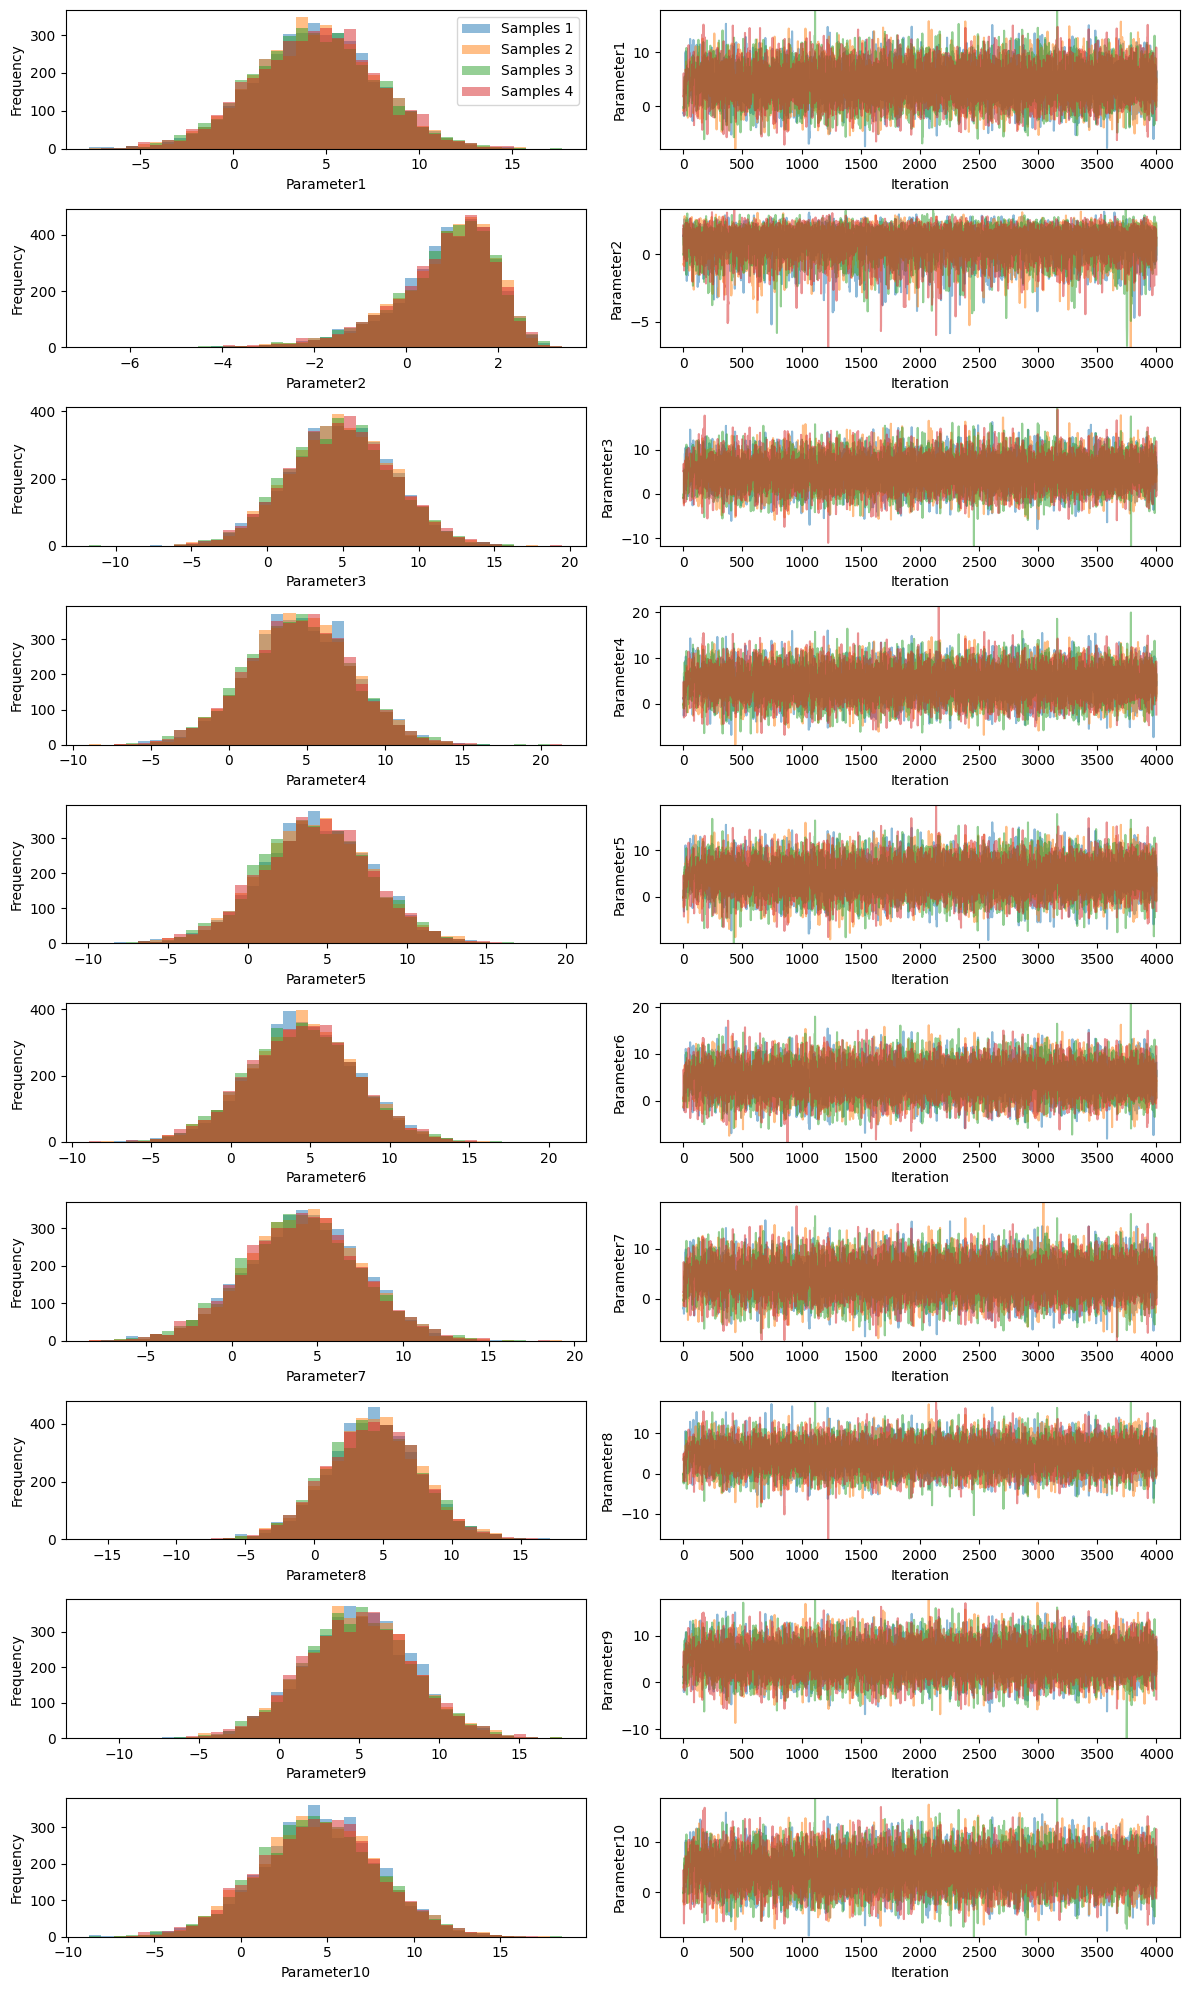

In [28]:
import pints.plot
pints.plot.trace(full_chains_transformed)
plt.show()